In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.shape

(1338, 7)

In [5]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [9]:
df.drop_duplicates(inplace=True)

C:\Users\frami\AppData\Local\Temp\ipykernel_36176\3870688284.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

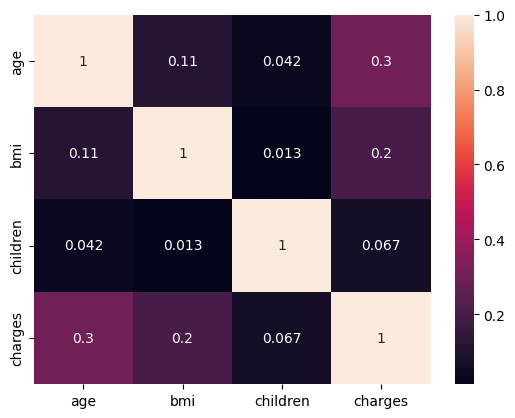

In [10]:
corr = df.corr()
sns.heatmap(corr, annot=True)

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['region'] = le.fit_transform(df['region'])
df['smoker'] = le.fit_transform(df['smoker'])
#y = le.transform(y)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [12]:
##df['charges_class'] = df['charges'].apply(lambda x: 1 if x > 15000 else 0)
##df

k:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
k:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
k:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
k:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
k:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change

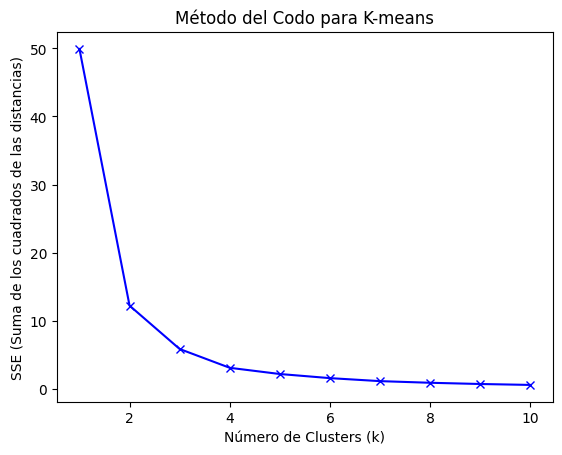

k:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


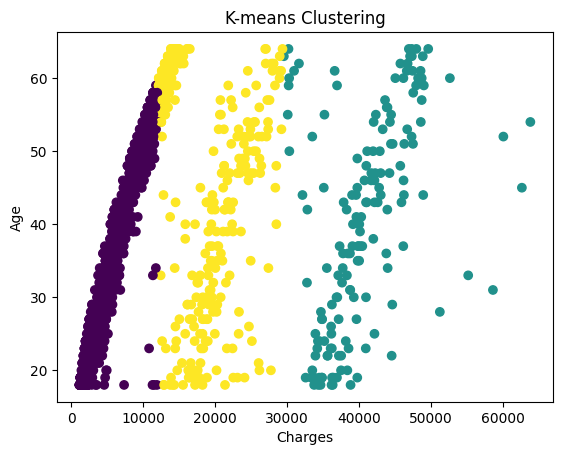

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

X = df[['charges']]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

sse = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.plot(k_values, sse, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('SSE (Suma de los cuadrados de las distancias)')
plt.title('Método del Codo para K-means')
plt.show()

k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
kmeans.fit(X_scaled)

labels = kmeans.labels_

plt.scatter(df['charges'], df['age'], c=labels)
plt.xlabel('Charges')
plt.ylabel('Age')
plt.title('K-means Clustering')
plt.show()


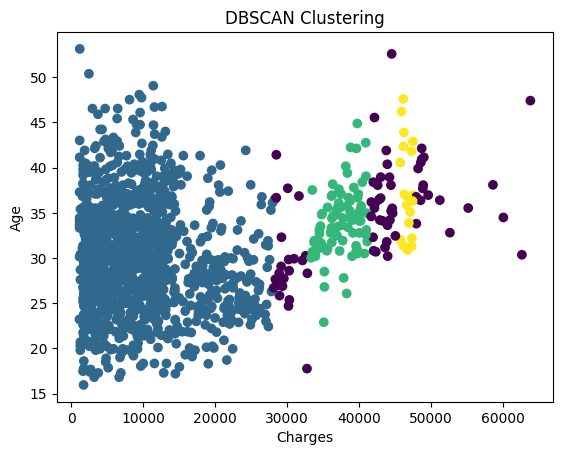

In [33]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

# Obtener la columna "charges" del dataframe
X = df[['charges']]

# Normalizar los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar el algoritmo de clasificación DBSCAN
dbscan = DBSCAN(eps=0.015, min_samples=18)
dbscan.fit(X_scaled)

# Obtener las etiquetas de los clusters
labels = dbscan.labels_

# Crear un gráfico de dispersión para visualizar la clasificación
plt.scatter(df['charges'], df['bmi'], c=labels)
plt.xlabel('Charges')
plt.ylabel('Age')
plt.title('DBSCAN Clustering')
plt.show()